In [1]:
from rewann.tools import load_series_stats, mean_comparison
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

0.08716204682764417 2.1791348593060085


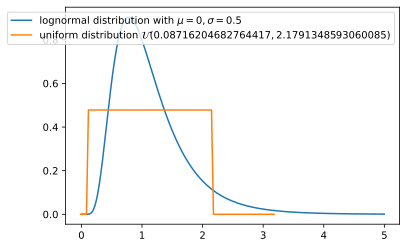

In [3]:
mu = 0
sigma = 0.5



x = np.linspace(0.0001, 5, 1000)

lognormal = 1/(sigma * x * np.sqrt(2 * np.pi)) * np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))

mean = np.exp(mu + sigma**2 / 2)
variance = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)

plt.plot(x, lognormal, label=f'lognormal distribution with $\mu={mu}, \sigma={sigma}$')


b = mean + np.sqrt(3*variance)
a = 2*mean - b

print(a, b)

x = np.linspace(a-0.1, b+1, 100)
uniform = 1 / (b - a) * ((a <= x) & (x < b))
plt.plot(x, uniform, label=f'uniform distribution $\mathcal{{U}}({a},{b})$')
plt.legend()
plt.show()

In [4]:
df = load_series_stats("../data/direct_dist_comparison")

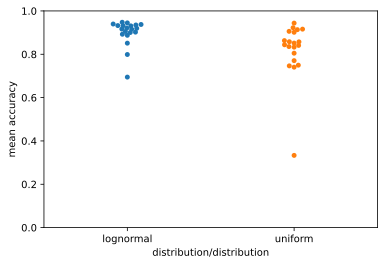

In [5]:
sns.swarmplot(x="distribution/distribution", y="mean accuracy", data=df)
plt.ylim([0,1])
plt.show()

In [6]:
a = df[df['distribution/distribution'] == 'lognormal']['mean accuracy']
b = df[df['distribution/distribution'] == 'uniform']['mean accuracy']

print(f'mean lognormal: {a.mean()}, uniform: {b.mean()}')
from scipy.stats import ttest_ind
t, p = ttest_ind(a, b, equal_var=False)
print (t, p)

mean lognormal: 0.9003300000000001, uniform: 0.8216566666666667
2.458910796397498 0.020716142917177324
